# fbprophet 주식 종가 예측

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import FinanceDataReader as fdr
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, plot_components_plotly
import datetime
from tqdm import tqdm
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, LSTM,Dropout,Bidirectional
from keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Activation, LSTM,Dropout,Bidirectional
from keras.callbacks import EarlyStopping
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller

In [2]:
df=pd.read_csv("stock_list.csv")
df['종목코드'] = df['종목코드'].apply(lambda x : str(x).zfill(6))

#### fbprophet - test
parameter

Prophet(
    growth='linear',
    changepoints=None,
    n_changepoints=25,
    changepoint_range=0.8,
    yearly_seasonality='auto',
    weekly_seasonality='auto',
    daily_seasonality='auto',
    holidays=None,
    seasonality_mode='additive',
    seasonality_prior_scale=10.0,
    holidays_prior_scale=10.0,
    changepoint_prior_scale=0.05,
    mcmc_samples=0,
    interval_width=0.8,
    uncertainty_samples=1000,
    stan_backend=None,
)

In [3]:
start_date = '20210101'
end_date = '20211105'
sample_code = '950130'
stock = fdr.DataReader(sample_code, start = start_date, end = end_date)

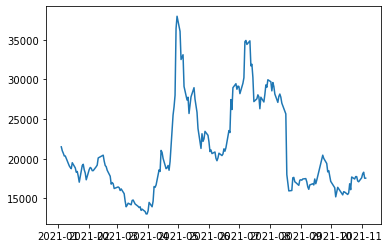

In [20]:
plt.plot(stock['Close'])

# fbprophet 
기간 : 2020.01.01 ~

In [6]:
result=pd.read_csv('sample_submission.csv')

In [7]:
for code in tqdm(df['종목코드'].values):
    start_date = '20200101'
    end_date = '20211031'
    sample_code = code
    stock = fdr.DataReader(sample_code, start = start_date, end = end_date)
    stock['ds']=[x for x in range(0,len(stock))]
    stock['ds']=stock['ds'].apply(lambda x : stock.index[x])
    stock=stock.rename(columns={'Close': 'y'})
    fbstock=stock[['ds','y']].reset_index(drop=True)
    m=Prophet(yearly_seasonality=True,daily_seasonality=True)
    m.fit(fbstock)
    future = m.make_future_dataframe(periods=5)
    forecast=m.predict(future)
    forecast=forecast.tail(5).reset_index(drop=True)
    for x in range(0,371): # 확인해보기
        if code==result.columns[x]:
            temp=x
            break
    for k in range(0,5):
        result.iloc[k,[temp]]=forecast['yhat'][k]

100%|████████████████████████████████████████████████████████████████████████████████| 370/370 [28:14<00:00,  4.58s/it]


In [8]:
result

,Day,000060,000080,000100,000120,000150,000240,000250,000270,000660,...,330860,336260,336370,347860,348150,348210,352820,357780,363280,950130
0,2021-11-01,30599.197315,33968.141623,60936.494755,138024.231392,98818.803391,15002.132256,47591.970157,84275.795470,100165.177830,...,45013.463682,49599.941922,79005.136134,37013.533766,28324.283519,49202.790548,322432.640468,259839.325524,22914.262531,14687.714383
1,2021-11-02,30701.743790,33809.873281,60943.820549,136582.731853,98843.294324,14793.567202,47426.892987,84369.352193,100087.365569,...,44428.280324,49199.258819,78980.921518,36365.669480,28750.312371,49008.571168,320880.630429,259144.171544,22989.796786,14239.519519
2,2021-11-03,30880.491803,33943.781808,59780.959971,135280.438605,99783.280567,14762.793573,45993.708577,83514.066239,98673.390697,...,45219.626441,47040.417856,78303.734650,35178.934546,28443.260326,51044.275878,306365.508958,254855.610040,27289.137390,14424.464864
3,2021-11-04,31079.632809,33965.259292,59648.553370,133718.119125,99733.127137,14668.678223,45762.192141,83722.669644,98992.326310,...,44181.482495,46730.014399,78579.727777,33904.887519,29344.598426,51092.922563,306412.065426,253764.201695,27641.909509,13884.343614
4,2021-11-05,31277.453577,33922.872359,59761.261237,133136.425775,99770.812575,14438.683835,45459.160799,83911.004978,98786.376236,...,43325.397710,46419.071065,78679.212571,32339.735160,29756.310844,51067.469184,303569.598382,252610.586597,27737.497752,13251.321365
5,2021-11-29,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,2021-11-30,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,2021-12-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,2021-12-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,2021-12-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
